## Creating Maps with GeoPandas

GeoPandas comes with built-in functions for visualizing geospatial data and creating maps. It uses the very powerful `matplotlib` library to do the plotting. If you are not familiar with matplotlib, check out this [introductory tutorial](https://www.data-blogger.com/2017/11/15/python-matplotlib-pyplot-a-perfect-combination/).

This notebook shows how we can create visualizaion using the datasets from the [Working with GeoPandas](#working-with-geopandas) exercise.

In [1]:
import geopandas as gpd
import os
data_pkg_path = 'data'
filename = 'karnataka.gpkg'
path = os.path.join(data_pkg_path, filename)
districts = gpd.read_file(path, layer='karnataka_districts')
roads = gpd.read_file(path, layer='karnataka_major_roads')
national_highways = roads[roads['ref'].str.match('^NH') == True]

### Matplotlib Basics

Before we start using `matplotlib` inside a Jupyter notebook, it is useful to set the matplotlib backend to `inline`. This setting makes the matplotlib graphs included in your notebook, next to the code. We use the [magic function](https://ipython.readthedocs.io/en/stable/interactive/tutorial.html#magics-explained) `%matplotlib` to achieve this.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

It is important to understand the 2 matplotlib objects

* Figure: This is the main container of the plot. A figure can contain multiple plots inside it
* Axes:  Axes refers to an individual plot or graph. A figure contains 1 or more axes.

We can now work on creating a *figure* with multiple *axes* - each with a different rendering on a map layer.

### Rendering Map Layouts

The `subplots()` function creates one or more plots within the figure. You can design a map layout with multiple rows/columns. In the code below, we create a map with **1** row and **3** columns. Using the `set_size_inches()` function, we set the size of the map to 15in x 7in.

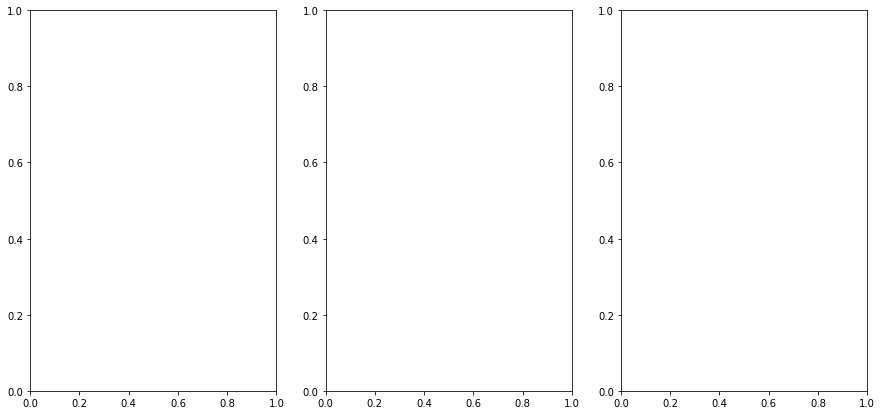

In [3]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(15,7)

The `subplots()` function returns 2 items. The figure and a tuple with all the axes within the figure. As we have 3 axes, we unpack them into separate variables

In [4]:
ax0, ax1, ax2 = axes

GeoDataFrame objects have a `plot()` method that uses `pyplot` and creates a plot. We supply the `ax` object to the function so the resulting plot is displayed in the Axes created previously. Here we add the `districts` polygon layer into the `ax0` object - which refers to the first subplot.

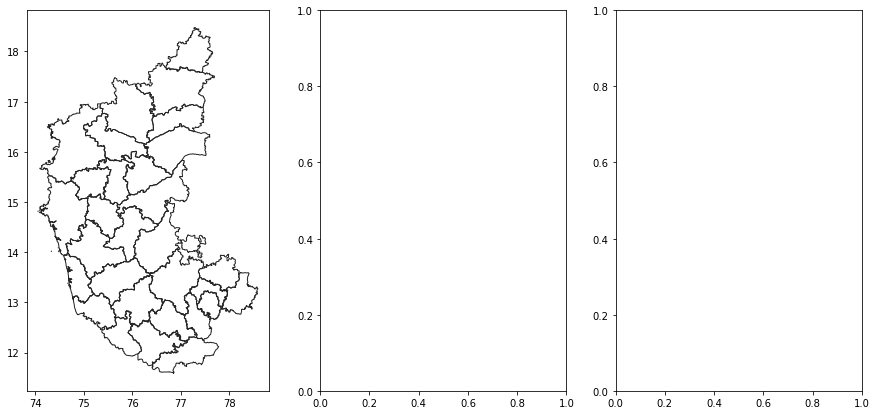

<Figure size 432x288 with 0 Axes>

In [5]:
districts.plot(ax=ax0, linewidth=1, facecolor='none', edgecolor='#252525')
fig

Similarly, we add the `roads` layer to the second axes.

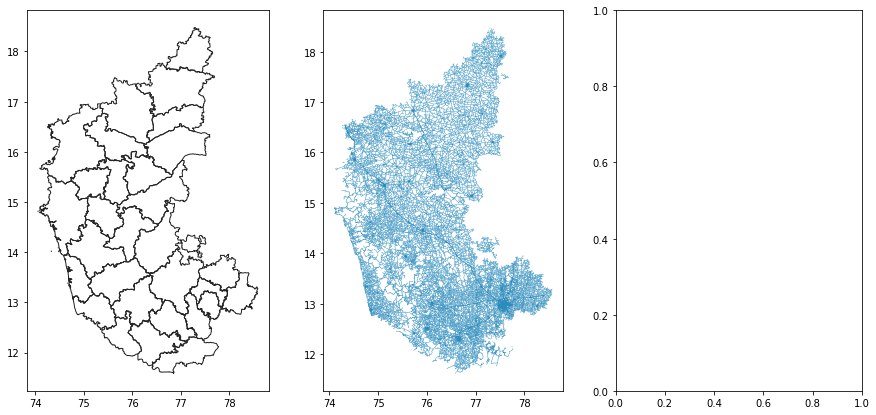

<Figure size 432x288 with 0 Axes>

In [6]:
roads.plot(ax=ax1, linewidth=0.4, color='#2b8cbe')
fig

Lastly, we add the `national_highways` layer to the third axes.

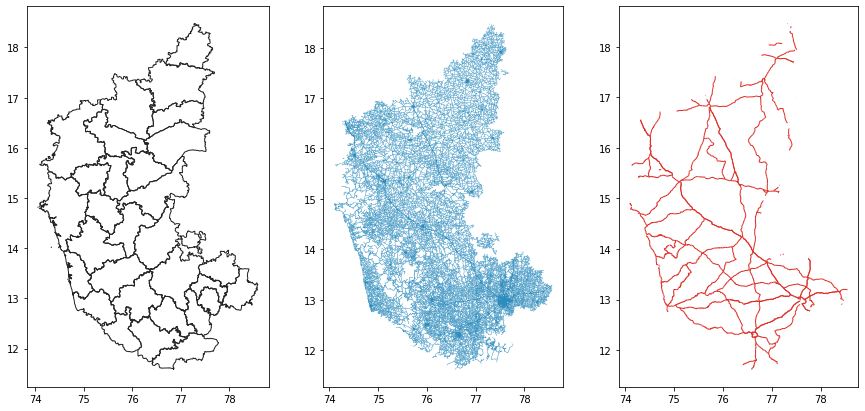

<Figure size 432x288 with 0 Axes>

In [7]:
national_highways.plot(ax=ax2, linewidth=1, color='#de2d26')
fig

We can turn off the coordinates display on the X-axis and Y-axis using `plt.axis('off')`. It is useful to set a title to each map. The `set_title()` function adds the title to the approproate axes. We specify a negative `y` parameter to place the title at the bottom of the map instead of top.

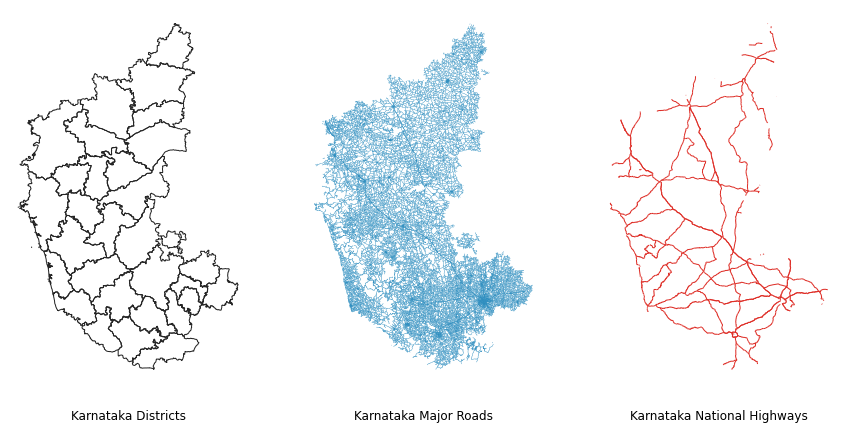

In [8]:
ax0.axis('off')
ax0.set_title('Karnataka Districts', y=-0.1)
ax1.axis('off')
ax1.set_title('Karnataka Major Roads', y=-0.1)
ax2.axis('off')
ax2.set_title('Karnataka National Highways', y=-0.1)
fig

Now that our map is ready, we can save the map to the computer using the `savefig()` function.

In [9]:
output_filename = 'map_layout.png'
output_dir = 'output'
output_path = os.path.join(output_dir, output_filename)

if not os.path.exists(output_dir):
    os.mkdir(output_dir)

fig.savefig(output_path, dpi=300)

### Creating A Map with Multiple Layers

If we want to display multiple layers, we simply create new plots on the same `Axes`. Here we create a figure with a single axes and add the `districts`,`roads` and `national_highways` layers to the same axes.

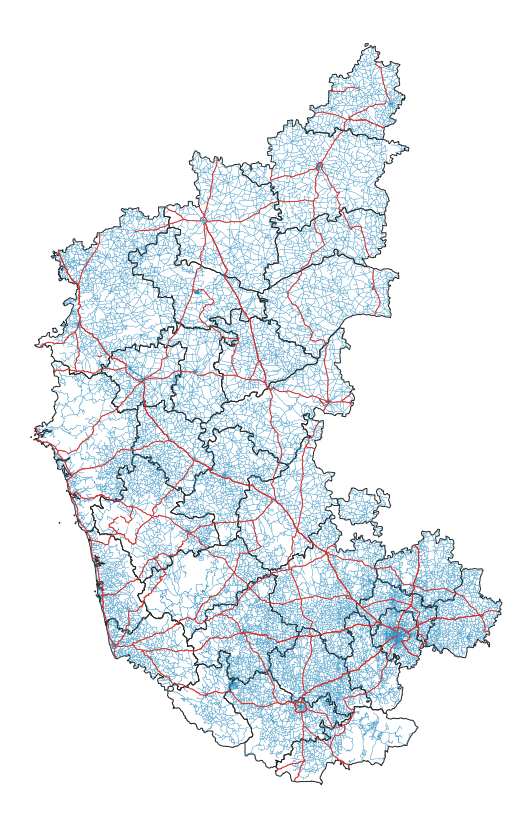

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(10,15)

plt.axis('off')

districts.plot(ax=ax, linewidth=1, facecolor='none', edgecolor='#252525')
roads.plot(ax=ax, linewidth=0.4, color='#2b8cbe')
national_highways.plot(ax=ax, linewidth=1, color='#de2d26')


output_filename = 'multiple_layers.png'
output_path = os.path.join(output_dir, output_filename)
plt.savefig(output_path, dpi=300)

### Labelling Features

We can also add labels to the maps, but that requires a bit of pre-processing. Let's say we want to add a label for each of the distrit polygons. First, we need to decide the anchor position of the label. We can use `representative_point()` to get a point inside each polygon that best represents the geometry. It is similar to a centroid, but is guranteed to be inside the polygon. Below code creates a new field in the GeoDataFrame called `label_position` with the coordinates of the anchor point.

In [11]:
districts['label_position'] = districts['geometry'].apply(lambda x: x.representative_point().coords[:])
districts['label_position'] = [coords[0] for coords in districts['label_position']]

Now we can use the `annotate()` function and iterate over each polygon to add labels with the name of the district from the *DISTRICT* column and place it at the coordinates from the *label_position* column.

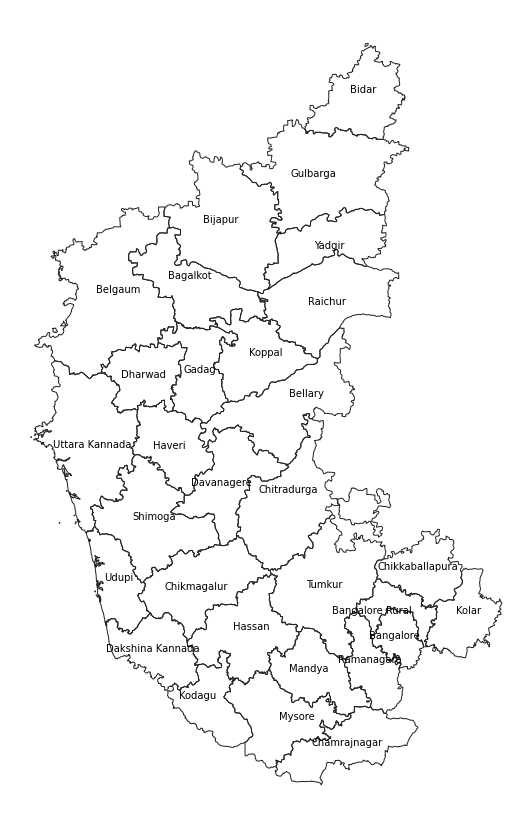

In [12]:
fig, ax = plt.subplots(figsize=(10, 15))
plt.axis('off')

districts.plot(ax=ax, linewidth=1, facecolor='none', edgecolor='#252525')

for idx, row in districts.iterrows():
    plt.annotate(text=row['DISTRICT'], xy=row['label_position'], horizontalalignment='center')
